In [1]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

In [2]:
pd.set_option(
    'display.max_rows', 100
)
url ="http://publicplansdata.org/api/"
focus_plans_list=['101', '110', '125', '179']

In [3]:
#Make sure to use QDataset, NOT QDataSet.  Makes a big difference
paramsratios = {
    "q": "QDataset",
    "dataset": "pensiongasbschedules",
     "format": "json"
}
paramsbasicplandata = {
    "q": "QDataset",
    "dataset": "pensionplanbasics",
     "format": "json"
}

In [4]:
#create requests
ratiosresponse = requests.get(url, params = paramsratios)
plandataresponse = requests.get(url,params=paramsbasicplandata)

In [5]:
#create json response object
fundedratiosdata = ratiosresponse.json()
plandata = plandataresponse.json()

In [6]:
#change response object into DataFrame
funded_ratios_full = pd.DataFrame(fundedratiosdata[1:])
plan_data_full = pd.DataFrame(plandata[1:])

In [7]:
#remove rows with empty funded ratio data
funded_ratio_df=funded_ratios_full[['ppd_id','fy','ActFundedRatio_GASB','ActFundedRatio_est','PercentReqContPaid']].dropna()

In [8]:
plan_data_df=plan_data_full[['ppd_id','PlanName','StateAbbrev','PlanClosed','PlanYearClosed',]]

In [9]:
plan_test_data_df=pd.merge(funded_ratio_df,plan_data_df,how="inner",on="ppd_id")
plan_test_data_df['ActFundedRatio_GASB'] = plan_test_data_df['ActFundedRatio_GASB'].astype(float)
plan_test_data_df['PercentReqContPaid'] = plan_test_data_df['PercentReqContPaid'].astype(float)

In [10]:
focus_plans_data_df=plan_test_data_df[plan_test_data_df["ppd_id"].isin(focus_plans_list)]

In [11]:
focus_plans_data_df

,ppd_id,fy,ActFundedRatio_GASB,ActFundedRatio_est,PercentReqContPaid,PlanName,StateAbbrev,PlanClosed,PlanYearClosed
1970,101,2001,0.96400,0.000,1.00000,South Dakota RS,SD,0,None
1971,101,2002,0.96700,0.000,1.00000,South Dakota RS,SD,0,None
1972,101,2003,0.97200,0.000,1.00000,South Dakota RS,SD,0,None
1973,101,2004,0.97700,0.000,1.00000,South Dakota RS,SD,0,None
1974,101,2005,0.96600,0.000,1.00000,South Dakota RS,SD,0,None
1975,101,2006,0.96700,0.000,1.00000,South Dakota RS,SD,0,None
1976,101,2007,0.97100,0.000,1.00000,South Dakota RS,SD,0,None
1977,101,2008,0.97200,0.000,1.00000,South Dakota RS,SD,0,None
1978,101,2009,0.91800,0.000,0.91000,South Dakota RS,SD,0,None
1979,101,2010,0.96300,0.000,1.00000,South Dakota RS,SD,0,None


In [12]:
plan_101=focus_plans_data_df[focus_plans_data_df["ppd_id"]=="101"]
plan_101_fundrat=plan_101["ActFundedRatio_GASB"]
plan_101_contpaid=plan_101["PercentReqContPaid"]
plan_101_fy=plan_101["fy"]

plan_110=focus_plans_data_df[focus_plans_data_df["ppd_id"]=="110"]
plan_110_fundrat=plan_110["ActFundedRatio_GASB"]
plan_110_contpaid=plan_110["PercentReqContPaid"]
plan_110_fy=plan_110["fy"]

plan_125=focus_plans_data_df[focus_plans_data_df["ppd_id"]=="125"]
plan_125_fundrat=plan_125["ActFundedRatio_GASB"]
plan_125_contpaid=plan_125["PercentReqContPaid"]
plan_125_fy=plan_125["fy"]

plan_179=focus_plans_data_df[focus_plans_data_df["ppd_id"]=="179"]
plan_179_fundrat=plan_179["ActFundedRatio_GASB"]
plan_179_contpaid=plan_179["PercentReqContPaid"]
plan_179_fy=plan_179["fy"]

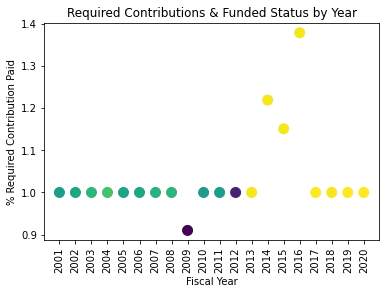

In [27]:
plt.title("Required Contributions & Funded Status by Year")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("Fiscal Year")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_101_fy,plan_101_contpaid,c=plan_101_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_101_cont_v_year.png')

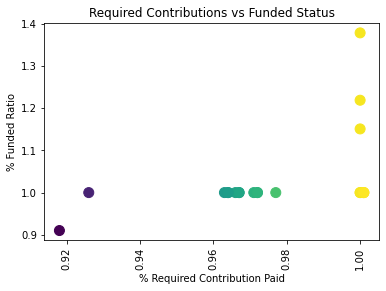

In [26]:
plt.title("Required Contributions vs Funded Status")
plt.xlabel("% Required Contribution Paid")
plt.ylabel("% Funded Ratio")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_101_fundrat,plan_101_contpaid,c=plan_101_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plan_101_fund_v_cont.png')